# Phyiscs Problems - Lectures 22 & 23 - Homework 10

FALL 2024


### 1) Altitude of a satellite

A satellite is to be launched into a circular orbit around the Earth so that it orbits the planet once every T seconds.

The altitude h above the Earth’s surface that the satellite must have is:

$$h = \left( \frac{G M T^2}{4\pi^2} \right)^{1/3} - R$$

where $G = 6.67 \times 10^{-11}$ m$^3$ kg$^{-1}$ s$^{-2}$
is Newton's gravitational constant, $M = 5.97 \times 10^{24}$ kg is the mass of the Earth, and $R = 6371$ km is its radius.

#### Write a function that asks the user to enter the desired value of T and then calculates and prints out the correct altitude in meters.


In [15]:
import math

G = 6.67e-11
M = 5.97e24
R = 6371000

def calculate_altitude(T):
    term = (G * M * T**2) / (4 * math.pi**2)
    h = round(term**(1/3) - R)
    return h

while True:
    try:
        T = float(input("Enter the orbital period in seconds: "))
        break
    except ValueError:
        print("Invalid input. Please enter a valid number.")

# Calculate and display altitude
altitude = calculate_altitude(T)
print(f"The altitude of the satellite is {altitude} meters")

For an orbital period of 24.00 hours:
Altitude: 35855910 meters
For an orbital period of 1.50 hours:
Altitude: 279322 meters
For an orbital period of 0.75 hours:
Altitude: -2181560 meters




Use your program to calculate the altitudes of satellites that orbit the Earth once
a day (so-called “geosynchronous” orbit), once every 90 minutes, and once every
45 minutes. What do you conclude from the last of these calculations?





In [25]:
import math

# Constants
G = 6.67e-11
M = 5.97e24
R = 6371000

def calculate_altitude(T):
    term = (G * M * T**2) / (4 * math.pi**2)
    h = round(term**(1/3) - R)
    return h


periods = [
    86400,
    5400,
    2700
]

# Calculate altitudes
for T in periods:
    altitude = calculate_altitude(T)
    print(f"For an orbital period of {T/3600:.2f} hours:")
    print(f"Altitude: {altitude} meters")



print("\n" + "That the longer the orbital period is, the altitude grows exponentially")

For an orbital period of 24.00 hours:
Altitude: 35855910 meters
For an orbital period of 1.50 hours:
Altitude: 279322 meters
For an orbital period of 0.75 hours:
Altitude: -2181560 meters

That the longer the orbital period is, the altitude grows exponentially


Technically a geosynchronous satellite is one that orbits the Earth once persidereal
day, which is 23.93 hours, not 24 hours. Why is this? And how much difference
will it make to the altitude of the satellite?

In [29]:
import math

# Constants
G = 6.67e-11
M = 5.97e24
R = 6371000

def calculate_altitude(T):
    term = (G * M * T**2) / (4 * math.pi**2)
    h = round(term**(1/3) - R)
    return h


periods = [
    86400,
    86148,
    5400,
    2700
]

# Calculate altitudes
for T in periods:
    altitude = calculate_altitude(T)
    print(f"For an orbital period of {T/3600:.2f} hours:")
    print(f"Altitude: {altitude} meters")



print("\n" + "Persidereal is based off Earth rotating once relative to fixed stars, while geosync is staying fixed to a point on Earth")

For an orbital period of 24.00 hours:
Altitude: 35855910 meters
For an orbital period of 23.93 hours:
Altitude: 35773762 meters
For an orbital period of 1.50 hours:
Altitude: 279322 meters
For an orbital period of 0.75 hours:
Altitude: -2181560 meters

Persidereal is based off Earth rotating once relative to fixed stars, while geosync is staying fixed to a point on Earth


#### Modify your code to calculate the times from 0.5 hour  to 30 days, in steps of 0.5 hours.   Then plot those data points (time vs h) with properly labled axes.  Plot orbits with height below 0 as red, and plots positive heeghts with times less than geosynchronous in blue and those longer in green.

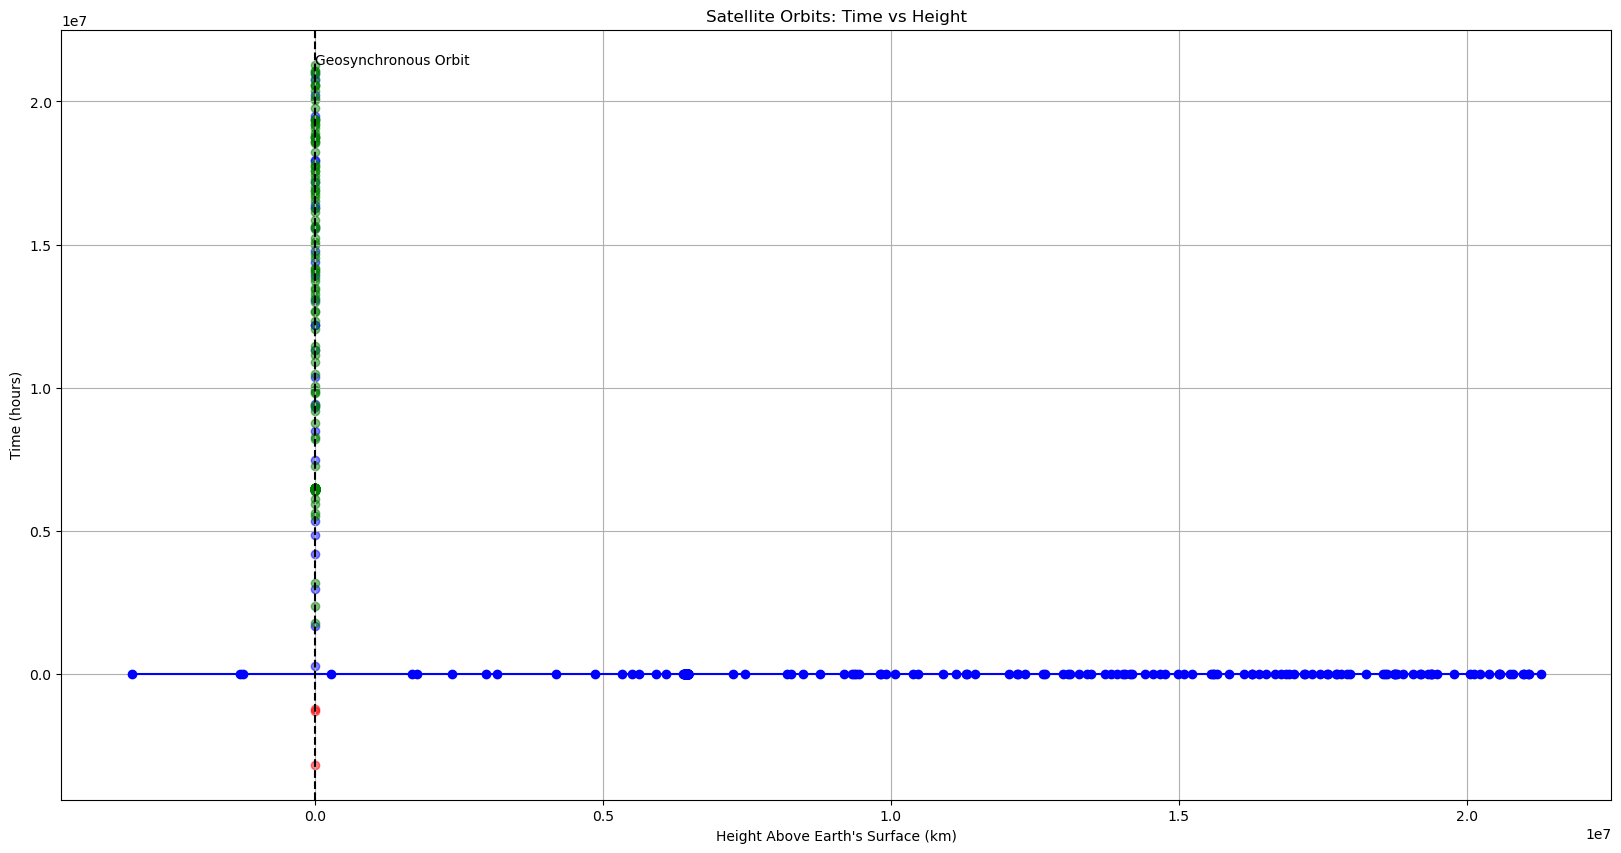

In [97]:
import math
import cmath
import matplotlib.pyplot as plt
import numpy as np

# Constants
G = 6.67e-11
M = 5.97e24
R = 6371000

def calculate_altitude(T):
    term = (G * M * T**2) / (4 * math.pi**2)
    if term < 0:
        cube_root = cmath.sqrt(cmath.sqrt(term)) * cmath.exp(1j*math.pi/3)
        h = round(abs(cube_root - R), 2)
    else:
        h = round(term**(1/3) - R, 2)
    return h
    
start_time = 1800
end_time = 432000
step = 1800
times = np.arange(start_time, end_time + 1, step)

heights = []
colors = []

for t in times:
    altitude = calculate_altitude(t)
    heights.append(altitude)
    
    if altitude >= 0:
        if t < 86400:
            colors.append('blue')
        else:
            colors.append('green')
    else:
        colors.append('red')


plt.figure(figsize=(20, 10))

plt.plot(heights, times/3600, marker='o', color='blue')
plt.xlabel('Height Above Earth\'s Surface (km)')
plt.ylabel('Time (hours)')
plt.title('Satellite Orbits: Time vs Height')

# Set up color mapping
for i, color in enumerate(colors):
    plt.scatter(times[i]/3600, heights[i], color=color, alpha=0.5)

# Add vertical lines for geosynchronous orbit
plt.axvline(x=86400/3600, color='k', linestyle='--')
plt.text(24, max(heights), 'Geosynchronous Orbit')
plt.grid(True)
plt.show()


### 2) Special Relativity

A spaceship travels from Earth in a straight line at a (relativistic)
speed $v$ to another planet $x$ light years away. Write a program to ask
the user for the value of $x$ and the speed $v$ as a fraction of the speed
of light, then print out the time in years that the spaceship takes to
reach its destination (a) in the rest frame of an observer on Earth
and (b) as perceived by a passenger on board the ship.

$$x' = \gamma (x - vt)$$

$$t' = \gamma \left(t - \frac{v x}{c^2}\right)$$

$$\gamma = \frac{1}{\sqrt{1 - \frac{v^2}{c^2}}}$$


In [57]:
import math

# Constants
c = 299792458  # Speed of light in m/s
LY = 9.46e12  # Light-year in meters

# User inputs
distance_ly = float(input("Enter the distance to the planet in light-years: "))
speed_fraction = float(input("Enter the speed of the spaceship as a fraction of the speed of light: "))

# Calculate time in Earth's frame
speed_mps = speed_fraction * c
time_earth = distance_ly * LY / speed_mps

# Calculate time in the spaceship's frame
gamma = 1 / math.sqrt(1 - speed_fraction**2)
time_ship = time_earth / gamma

# Print results
print(f"\nTime in Earth's frame: {time_earth:.2f} years")
print(f"Time in the spaceship's frame: {time_ship:.2f} years")

Enter the distance to the planet in light-years:  10
Enter the speed of the spaceship as a fraction of the speed of light:  .999



Time in Earth's frame: 315867.50 years
Time in the spaceship's frame: 14122.49 years


#### Use your program to calculate the answers for a planet 10 light years away with $v = 0.90c$,  $v = 0.98c$, $v = 0.999c$.

In [ ]:
At .90:
Time in Earth's frame: 350612.93 years
Time in the spaceship's frame: 152828.63 years
At .98:
Time in Earth's frame: 321991.46 years
Time in the spaceship's frame: 64075.49 years
At .999:
Time in Earth's frame: 315867.50 years
Time in the spaceship's frame: 14122.49 years


### 3) The quadratic equation

 Write a program that takes as input three numbers, $a$, $b$, and $c$, and prints out the two solutions to the quadratic equation $ax^2 + bx + c = 0$ using the standard
formula:

$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

Use your program to compute the solutions of $0.001x^2 + 1000x + 0.001 = 0$.

In [23]:
from math import sqrt
#Reading the values for coefficients
a=float(input("Enter the value for a:"))
b=float(input("Enter the value for b:"))
c=float(input("Enter the value for c:"))
disc=b*b-4*a*c
#First method for calculating the square roots
if disc==0:
    print("Roots are real and equal")
    x1=-b/2*a
    x2=-b/2*a
    print("Root 1=",x1)
    print("Root 2=",x2)
elif disc>0:
    print("Roots are real and unequal")
    x1=(-b+sqrt(b*b-4*a*c))/2*a
    x2=(-b-sqrt(b*b-4*a*c))/2*a
    print("Root 1=",x1)
    print("Root 2=",x2)
else:
    print("Roots are imaginary")

Enter the value for a: .001
Enter the value for b: 1000
Enter the value for c: .001


Roots are real and unequal
Root 1= -9.999894245993345e-13
Root 2= -0.999999999999


There is another way to write the solutions to a quadratic equation. Multiplying top and bottom of the solution above by $-b \mp \sqrt{b^2 - 4ac}$, show that the solutions
can also be written as:

$$x = \frac{2c}{-b \mp \sqrt{b^2 - 4ac}}$$

Add further lines to your program to print these values in addition to the earlier ones and again use the program to solve $0.001x^2 + 1000x + 0.001 = 0$. What do you see? How do you explain it?

In [21]:
from math import sqrt
#Reading the values for coefficients
a=float(input("Enter the value for a:"))
b=float(input("Enter the value for b:"))
c=float(input("Enter the value for c:"))
disc=b*b-4*a*c
#First method for calculating the square roots
if disc==0:
    print("Roots are real and equal")
    x1=-b/2*a
    x2=-b/2*a
    print("Root 1=",x1)
    print("Root 2=",x2)
elif disc>0:
    print("Roots are real and unequal")
    x1=(-b+sqrt(b*b-4*a*c))/2*a
    x2=(-b-sqrt(b*b-4*a*c))/2*a
    print("Root 1=",x1)
    print("Root 2=",x2)
else:
    print("Roots are imaginary")
#Second method for calculating the square roots
if disc==0:
    print("Roots are real and equal")
    x1=(2*c)/-b
    x2=(2*c)/-b
    print("Root 1=",x1)
    print("Root 2=",x2)
elif disc>0:
    print("Roots are real and unequal")
    x1=(2*c)/(-b+sqrt(b*b-4*a*c))
    x2=(2*c)/(-b-sqrt(b*b-4*a*c))
    print("Root 1=",x1)
    print("Root 2=",x2)
else:
    print("Roots are imaginary")

Enter the value for a: .001
Enter the value for b: 1000
Enter the value for c: .001


Roots are real and unequal
Root 1= -9.999894245993345e-13
Root 2= -0.999999999999
Roots are real and unequal
Root 1= -1000010.5755125057
Root 2= -1.000000000001e-06


In [ ]:
The 2nd method to compute via multiplying the denominator to the numerator does not work, as it gives a different value from the first method. 

Using what you have learned, write a new program that calculates both roots of a quadratic equation accurately in all cases. 

__(NOTE: MANY Online quadratic equation are WRONG, so careful how you check!!!).__